In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from random import sample
import random

## 1. Download the Dataset and Understand the Format

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive (2).zip


In [ ]:
!unzip archive.zip -d images/


Archive:  archive.zip
replace images/README? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: images/README           
  inflating: images/s1/1.pgm         
  inflating: images/s1/10.pgm        
  inflating: images/s1/2.pgm         
  inflating: images/s1/3.pgm         
  inflating: images/s1/4.pgm         
  inflating: images/s1/5.pgm         
  inflating: images/s1/6.pgm         
  inflating: images/s1/7.pgm         
  inflating: images/s1/8.pgm         
  inflating: images/s1/9.pgm         
  inflating: images/s10/1.pgm        
  inflating: images/s10/10.pgm       
  inflating: images/s10/2.pgm        
  inflating: images/s10/3.pgm        
  inflating: images/s10/4.pgm        
  inflating: images/s10/5.pgm        
  inflating: images/s10/6.pgm        
  inflating: images/s10/7.pgm        
  inflating: images/s10/8.pgm        
  inflating: images/s10/9.pgm        
  inflating: images/s11/1.pgm        
  inflating: images/s11/10.pgm       
  inflating: images/s11/2.pgm        
  i

In [ ]:
!ls images/s1


10.pgm	1.pgm  2.pgm  3.pgm  4.pgm  5.pgm  6.pgm  7.pgm  8.pgm	9.pgm


##2. Generate the Data Matrix and the Label vector

In [ ]:
directory = 'images/'
image_vectors = []

for folder in os.listdir(directory):
  path = os.path.join(directory, folder)
  if os.path.isdir(path):
    sub_directory = path
    for image in os.listdir(sub_directory):
            f = os.path.join(sub_directory, image)
            # The function imread loads an image from the specified file and returns it
            img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
            vector = np.array(img)
            result = vector.flatten()
            image_vectors.append(result)
image_vectors = np.array(image_vectors)
image_vectors.shape       

(400, 10304)

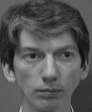

In [ ]:
cv2_imshow(img)

In [ ]:
labels = []

for i in range (1,41):
    for j in range (0,10):
        labels.append(i)

labels = np.array(labels)
labels    

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23,
       23, 23, 23, 23, 23

## 3. Split the Dataset into Training and Test sets

We used a random number generator with a set seed so we can always have the same split.

In [ ]:
train_data = []
test_data = []
train_labels = []
test_labels = []

for i in range(0,400):
    if(i%2 ==  0 ): 
        test_data.append(image_vectors[i])
        test_labels.append(labels[i])
    
    else:
        train_data.append(image_vectors[i])
        train_labels.append(labels[i])
    
train_data = np.array(train_data)   
test_data = np.array(test_data)    
train_labels = np.array(train_labels)    
test_labels = np.array(test_labels)    

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)



(200, 10304)
(200, 10304)
(200,)
(200,)


## 4. Classification using PCA

In [ ]:
alphaaa = np.array([0.8,0.85,0.9,0.95])

Compute mean

In [ ]:
train_data_mean = np.mean(train_data,axis=0)
print(train_data_mean)

[85.92  85.765 85.83  ... 73.33  73.975 73.91 ]


In [ ]:
train_data_mean.shape

(10304,)

Centering data matrix

In [ ]:
Centered_Train_Data_Matrix = train_data - np.transpose(train_data_mean)
print(Centered_Train_Data_Matrix)
print(Centered_Train_Data_Matrix.shape)

[[ 34.08   34.235  34.17  ...   8.67   13.025   5.09 ]
 [ 37.08   35.235  35.17  ...   4.67    5.025  -6.91 ]
 [ 36.08   34.235  35.17  ... -14.33   -6.975 -15.91 ]
 ...
 [ 17.08   18.235  19.17  ...   2.67    2.025   1.09 ]
 [ 12.08   14.235  13.17  ... -20.33  -25.975 -21.91 ]
 [ 15.08   14.235  13.17  ... -24.33  -21.975 -21.91 ]]
(200, 10304)


Compute covariance matrix

In [ ]:
Train_Covariance_Matrix = np.dot(np.transpose(Centered_Train_Data_Matrix),Centered_Train_Data_Matrix)/Centered_Train_Data_Matrix.shape[0]
print(Train_Covariance_Matrix)

[[1244.8836   1232.9162   1235.9314   ...  -94.9486   -111.422
   -63.4022  ]
 [1232.9162   1239.949775 1238.15505  ...  -83.32745   -97.200875
   -55.99615 ]
 [1235.9314   1238.15505  1252.4011   ...  -99.4789   -114.22925
   -71.7603  ]
 ...
 [ -94.9486    -83.32745   -99.4789   ... 1907.6511   1854.52825
  1721.8197  ]
 [-111.422     -97.200875 -114.22925  ... 1854.52825  1915.814375
  1798.80775 ]
 [ -63.4022    -55.99615   -71.7603   ... 1721.8197   1798.80775
  1901.1019  ]]


Asserting that our calculation of the covariance matrix is correct

In [ ]:
cov_mat = np.cov(np.transpose(train_data), bias=True)
print(cov_mat)
print(cov_mat.shape)
print(Train_Covariance_Matrix.shape)

[[1244.8836   1232.9162   1235.9314   ...  -94.9486   -111.422
   -63.4022  ]
 [1232.9162   1239.949775 1238.15505  ...  -83.32745   -97.200875
   -55.99615 ]
 [1235.9314   1238.15505  1252.4011   ...  -99.4789   -114.22925
   -71.7603  ]
 ...
 [ -94.9486    -83.32745   -99.4789   ... 1907.6511   1854.52825
  1721.8197  ]
 [-111.422     -97.200875 -114.22925  ... 1854.52825  1915.814375
  1798.80775 ]
 [ -63.4022    -55.99615   -71.7603   ... 1721.8197   1798.80775
  1901.1019  ]]
(10304, 10304)
(10304, 10304)


In [ ]:
try:
  np.testing.assert_array_equal(cov_mat, Train_Covariance_Matrix)
except AssertionError as e:
  print(e)


Arrays are not equal

Mismatched elements: 14390096 / 106172416 (13.6%)
Max absolute difference: 4.54747351e-13
Max relative difference: 2.22044605e-16
 x: array([[1244.8836  , 1232.9162  , 1235.9314  , ...,  -94.9486  ,
        -111.422   ,  -63.4022  ],
       [1232.9162  , 1239.949775, 1238.15505 , ...,  -83.32745 ,...
 y: array([[1244.8836  , 1232.9162  , 1235.9314  , ...,  -94.9486  ,
        -111.422   ,  -63.4022  ],
       [1232.9162  , 1239.949775, 1238.15505 , ...,  -83.32745 ,...


The difference is within acceptable range

Compute eigenvalues and eigenvectors

In [ ]:
train_eigen_vals, train_eigen_vecs = LA.eigh(Train_Covariance_Matrix)
idx = train_eigen_vals.argsort()[::-1]   
train_eigen_vals = train_eigen_vals[idx]
train_eigen_vecs = train_eigen_vecs[:,idx]
print(train_eigen_vals)
print(train_eigen_vecs)

[ 2.96184410e+06  2.05163847e+06  1.15954086e+06 ... -9.05548824e-10
 -1.45014944e-09 -2.09364375e-09]
[[-0.00533006  0.01367817  0.02043176 ...  0.          0.
   0.        ]
 [-0.00533682  0.01363471  0.02056149 ... -0.08894389 -0.34371563
   0.31834764]
 [-0.00537842  0.01382256  0.02048763 ...  0.044472    0.0368928
   0.41415896]
 ...
 [-0.00482806 -0.01150032  0.00957949 ...  0.0092485  -0.02169175
  -0.00475887]
 [-0.00513319 -0.01156446  0.00868791 ...  0.00076163 -0.01166828
   0.00147267]
 [-0.00644753 -0.01151462  0.00942919 ...  0.01047492  0.02517442
  -0.00352855]]


In [ ]:
train_eigen_vecs.shape

(10304, 10304)

Covariance matrix is symmetric, so the eigenvalues should be real numbers. When using the function eig() instead of eigh(), by default the returned value is complex. The imaginary part is due to numeric error so we should discard it. But since the matrix is symmetric we simply used eigh() which is optimized for symmetric matrices specifically and thus faster.

In [ ]:
#train_eigen_vals = train_eigen_vals.real
#train_eigen_vecs = train_eigen_vecs.real

Fraction of total variance

In [ ]:
train_eigen_values_total = np.sum(train_eigen_vals)
"""
train_eigen_vals = np.flip(train_eigen_vals)
train_eigen_vecs = np.flip(train_eigen_vecs,axis=1)
print(train_eigen_vals)
print(train_eigen_vecs)
"""
print("\nSum of  Eigen Values= ",train_eigen_values_total,"\n")
num_of_dim = np.empty(len(alphaaa),)
k = 0
for alpha in alphaaa:
  sum = 0
  r = 0
  while sum < alpha * train_eigen_values_total:
        sum += train_eigen_vals[r]
        r += 1
  num_of_dim[k] = r
  print("Explained variance for alpha = " + str(alpha) + " is " + str(num_of_dim[k]) + " dimensions")
  k += 1



Sum of  Eigen Values=  16215256.791449985 

Explained variance for alpha = 0.8 is 35.0 dimensions
Explained variance for alpha = 0.85 is 50.0 dimensions
Explained variance for alpha = 0.9 is 74.0 dimensions
Explained variance for alpha = 0.95 is 113.0 dimensions


Getting Reduced Dimentionality Matrix

In [ ]:
def get_reduced_dim_mat(dimensions, matrix):
  projection_matrix_r = np.delete(train_eigen_vecs, np.s_[int(dimensions) : train_eigen_vecs.shape[1]], axis=1)
  reduced_dim_mat = np.dot(np.transpose(projection_matrix_r),np.transpose(matrix)) 
  reduced_dim_mat = np.transpose(reduced_dim_mat)

  return reduced_dim_mat

In [ ]:
def KNNclf(neighbours, X_train, y_train, X_test, y_test):
  clf = KNeighborsClassifier(n_neighbors=neighbours)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("Accuracy: ", accuracy)
  #print(confusion_matrix(y_test, y_pred))
  #print(classification_report(y_test, y_pred))
  return accuracy

In [ ]:
k_neighbours = [1, 3, 5, 7]
accuracies = np.empty((len(alphaaa), len(k_neighbours)))
print(accuracies.shape)
for i, dim in enumerate(num_of_dim):
  X_train = get_reduced_dim_mat(dim, train_data - np.transpose(train_data_mean))
  X_test = get_reduced_dim_mat(dim, test_data - np.transpose(train_data_mean))
  y_train = train_labels
  y_test = test_labels
  for j, k in enumerate(k_neighbours):
    print(str(int(dim)) + " dimensions with " + str(k) + " nearest neighbours")
    accuracy = KNNclf(k, X_train, y_train, X_test, y_test)
    accuracies[i][j] = accuracy
accuracies = np.transpose(accuracies)


(4, 4)
35 dimensions with 1 nearest neighbours
Accuracy:  0.96
35 dimensions with 3 nearest neighbours
Accuracy:  0.855
35 dimensions with 5 nearest neighbours
Accuracy:  0.795
35 dimensions with 7 nearest neighbours
Accuracy:  0.715
50 dimensions with 1 nearest neighbours
Accuracy:  0.96
50 dimensions with 3 nearest neighbours
Accuracy:  0.855
50 dimensions with 5 nearest neighbours
Accuracy:  0.79
50 dimensions with 7 nearest neighbours
Accuracy:  0.71
74 dimensions with 1 nearest neighbours
Accuracy:  0.955
74 dimensions with 3 nearest neighbours
Accuracy:  0.865
74 dimensions with 5 nearest neighbours
Accuracy:  0.795
74 dimensions with 7 nearest neighbours
Accuracy:  0.71
113 dimensions with 1 nearest neighbours
Accuracy:  0.95
113 dimensions with 3 nearest neighbours
Accuracy:  0.865
113 dimensions with 5 nearest neighbours
Accuracy:  0.8
113 dimensions with 7 nearest neighbours
Accuracy:  0.72


We tried to project with the data before centering and after centering. As long as we centered both the train data and test data, we got the same results.

plotting different alpha values against accuracy for different k values for the KNN classifier

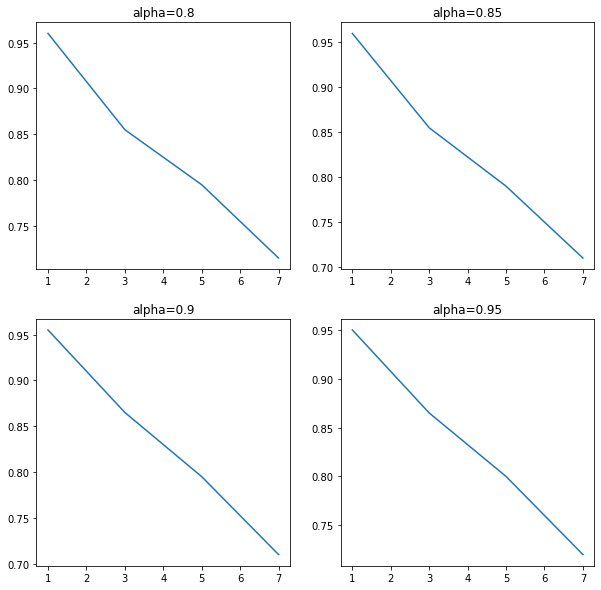

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(len(alphaaa)):
  plt.subplot(2, 2, i+1)
  plt.title("alpha=" + str(alphaaa[i]))
  plt.plot(k_neighbours, accuracies.T[i])

[0.8  0.85 0.9  0.95]
[[0.96  0.96  0.955 0.95 ]
 [0.855 0.855 0.865 0.865]
 [0.795 0.79  0.795 0.8  ]
 [0.715 0.71  0.71  0.72 ]]


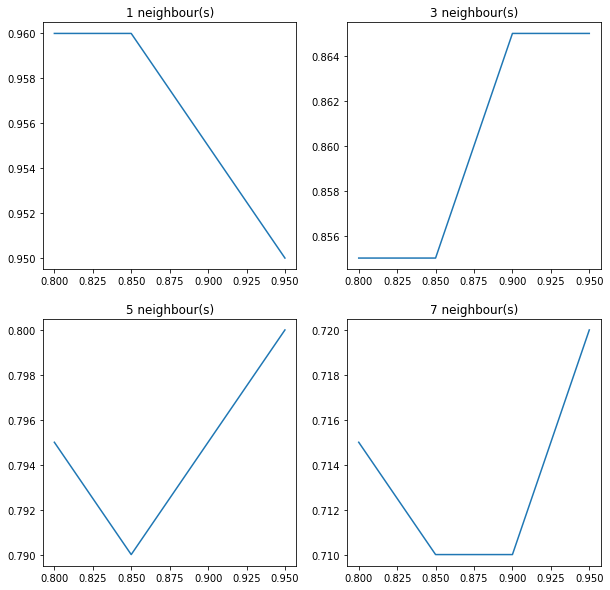

In [ ]:
print(alphaaa)
print(accuracies)
plt.figure(figsize=(10, 10))

for i in range(len(k_neighbours)):
  plt.subplot(2, 2, i+1)
  plt.title(str(k_neighbours[i]) + " neighbour(s)")
  plt.plot(alphaaa, accuracies[i])


## 5. Classification Using LDA

In [ ]:
n = 5
LDA_mean = np.zeros((40,train_data.shape[1]))
for i in range(0,train_data.shape[0], n):
    #print(i//5,"\t",i,"\t",i+5)
    LDA_mean[i//n] = np.mean(train_data[i:i+n,:], axis=0)
#print(LDA_mean)
#print("\n Dimensions:",LDA_mean.shape)
B = np.empty((10304,10304))
data_mean = train_data_mean.reshape(1, train_data.shape[1])
for i, mean_vec in enumerate(LDA_mean):

  mean_vec = mean_vec.reshape(1, train_data.shape[1])
  mu1_mu2 = mean_vec - data_mean
  B += n * np.dot(mu1_mu2.T, mu1_mu2)
print(B)
#print("\n Dimensions:", B.shape)

[[224227.91466994 221665.63466318 222839.27462158 ... -28922.92482806
  -29711.40513319 -21239.84644753]
 [221665.65367817 220007.56863471 220773.02382256 ... -25962.10150032
  -27243.18656446 -19358.44151462]
 [222839.30043176 220773.03056149 222085.44048763 ... -29058.17042051
  -30412.04131209 -22604.65057081]
 ...
 [-28922.92475887 -25962.11169175 -29058.1707515  ... 289232.62957949
  289742.23849968 281017.33517194]
 [-29711.39852733 -27243.18666828 -30412.04923837 ... 289742.25868791
  295816.06343554 289631.94486681]
 [-21239.84352855 -19358.40482558 -22604.64952508 ... 281017.34942919
  289631.93848538 295580.77355247]]


In [ ]:
LDA_Centered_Data_Matrix = np.zeros((train_data.shape[0],train_data.shape[1]))

for i in range(0,train_data.shape[0],1):
  LDA_Centered_Data_Matrix[i,:] = train_data[i,:] - LDA_mean[i//n,:]
  
print(LDA_Centered_Data_Matrix)   
print(LDA_Centered_Data_Matrix.shape)

LDA_Centered_Data_Matrix40 = np.empty((40, n, 10304))
for i in range(0, train_data.shape[0], n):
   print(i//n,"\t",i,"\t",i+n)
   LDA_Centered_Data_Matrix40[i//n] = LDA_Centered_Data_Matrix[i:i+n,:]

print("Center Class matrices: \n",LDA_Centered_Data_Matrix40,"\n") 
S = np.empty((10304,10304))
for i in range(0,40,1):
  S += np.dot(np.transpose(LDA_Centered_Data_Matrix40[i]),LDA_Centered_Data_Matrix40[i])

print(S)
print("\nS dims:",S.shape)

[[ -1.6   0.   -1.6 ...   8.6  12.    7.8]
 [  1.4   1.   -0.6 ...   4.6   4.   -4.2]
 [  0.4   0.   -0.6 ... -14.4  -8.  -13.2]
 ...
 [  0.8   1.6   2.8 ...   9.4  11.    8.4]
 [ -4.2  -2.4  -3.2 ... -13.6 -17.  -14.6]
 [ -1.2  -2.4  -3.2 ... -17.6 -13.  -14.6]]
(200, 10304)
0 	 0 	 5
1 	 5 	 10
2 	 10 	 15
3 	 15 	 20
4 	 20 	 25
5 	 25 	 30
6 	 30 	 35
7 	 35 	 40
8 	 40 	 45
9 	 45 	 50
10 	 50 	 55
11 	 55 	 60
12 	 60 	 65
13 	 65 	 70
14 	 70 	 75
15 	 75 	 80
16 	 80 	 85
17 	 85 	 90
18 	 90 	 95
19 	 95 	 100
20 	 100 	 105
21 	 105 	 110
22 	 110 	 115
23 	 115 	 120
24 	 120 	 125
25 	 125 	 130
26 	 130 	 135
27 	 135 	 140
28 	 140 	 145
29 	 145 	 150
30 	 150 	 155
31 	 155 	 160
32 	 160 	 165
33 	 165 	 170
34 	 170 	 175
35 	 175 	 180
36 	 180 	 185
37 	 185 	 190
38 	 190 	 195
39 	 195 	 200
Center Class matrices: 
 [[[ -1.6   0.   -1.6 ...   8.6  12.    7.8]
  [  1.4   1.   -0.6 ...   4.6   4.   -4.2]
  [  0.4   0.   -0.6 ... -14.4  -8.  -13.2]
  [ -0.6  -1.   -0

In [ ]:
print(np.allclose(S.transpose(),S))

False


In [ ]:
"""
fixed_S = (np.triu_indices(len(S),1))
S[fixed_S] = np.transpose(np.tril(S,-1))[fixed_S]
print(np.allclose(S.transpose(),S))
print(S)
"""

'\nfixed_S = (np.triu_indices(len(S),1))\nS[fixed_S] = np.transpose(np.tril(S,-1))[fixed_S]\nprint(np.allclose(S.transpose(),S))\nprint(S)\n'

In [ ]:
S_inv=np.linalg.inv(S)
print(S_inv.shape)
print("\n",S_inv)

(10304, 10304)

 [[ 1.23946677e+09 -6.18270037e+09 -4.39555048e+09 ...  4.06709403e+00
   1.53108052e+01  3.09516374e+00]
 [-6.43111147e+07 -1.16880362e+09  3.08829561e+09 ...  8.18816573e+00
  -1.72779906e+01  2.45812708e+00]
 [ 6.80178070e+08 -4.64946168e+08  2.15020552e+09 ...  2.56084514e+00
   2.92366407e-01  3.31917740e+00]
 ...
 [-1.01239390e+08 -1.42403440e+08 -9.96700829e+07 ... -8.70287227e-01
  -5.23469501e-01 -2.19446614e-01]
 [-1.11610755e+08  7.84015229e+06 -1.34989901e+08 ...  4.93112420e-01
  -2.37900911e-02 -2.18467358e-01]
 [ 1.03942851e+08  4.35150356e+07 -3.05596585e+07 ... -2.42164956e-01
  -3.66937384e-01  2.17447614e-01]]


In [ ]:
#print(np.dot(S_inv,S))

In [ ]:
"""
fixed_S_inv = (np.triu_indices(len(S_inv),1))
S_inv[fixed_S_inv] = np.transpose(np.tril(S_inv,-1))[fixed_S_inv]
print((np.transpose(S_inv)== S_inv).all())
print(S_inv)
print(B)
SB=np.dot(S_inv,B)
print(SB)
print(SB.shape)
"""

'\nfixed_S_inv = (np.triu_indices(len(S_inv),1))\nS_inv[fixed_S_inv] = np.transpose(np.tril(S_inv,-1))[fixed_S_inv]\nprint((np.transpose(S_inv)== S_inv).all())\nprint(S_inv)\nprint(B)\nSB=np.dot(S_inv,B)\nprint(SB)\nprint(SB.shape)\n'

In [ ]:
SB = np.dot(S_inv,B)

In [ ]:
#S_eigenvals, S_eigenvecs = LA.eig(SB)

In [ ]:
S_eigenvals, S_eigenvecs = LA.eigh(SB)

We were supposed to use `eig` instead of `eigh` but it gave us completely inaccurate results. We could not debug the cause.

In [ ]:
idx = S_eigenvals.argsort()[::-1]   
eigenvals = S_eigenvals[idx].real
eigenvecs = S_eigenvecs[:,idx].real
print(eigenvals)
print(eigenvals.shape)
print(eigenvecs)
print(eigenvecs.shape)

[ 3.62134336e+19  1.81115691e+19  1.01284467e+19 ... -9.98806364e+18
 -1.81047376e+19 -3.62136529e+19]
(10304,)
[[-0.00443486  0.02220571 -0.00747181 ...  0.0084922  -0.02231279
   0.00425782]
 [-0.00447355  0.02212308 -0.00741777 ...  0.00845933 -0.02224159
   0.00429872]
 [-0.00440099  0.02238734 -0.00719191 ...  0.00820507 -0.02246846
   0.0042203 ]
 ...
 [-0.00030045  0.00101397  0.00097857 ...  0.00093706  0.00104072
  -0.00030363]
 [-0.00026518 -0.00043082  0.0001545  ...  0.00016565 -0.00042545
  -0.00027605]
 [ 0.00059652  0.00079276 -0.00014911 ... -0.00015432  0.00078844
   0.00060483]]
(10304, 10304)


In [ ]:
projection_matrix = eigenvecs[:,0:39].real
print(projection_matrix)
print(projection_matrix.shape)

[[-0.00443486  0.02220571 -0.00747181 ... -0.01267952  0.0158858
  -0.00187608]
 [-0.00447355  0.02212308 -0.00741777 ... -0.01369733  0.01436833
  -0.00265646]
 [-0.00440099  0.02238734 -0.00719191 ... -0.01356878  0.0156137
  -0.00193169]
 ...
 [-0.00030045  0.00101397  0.00097857 ...  0.00160473  0.00071073
   0.00300409]
 [-0.00026518 -0.00043082  0.0001545  ...  0.00014404 -0.00166696
  -0.00048365]
 [ 0.00059652  0.00079276 -0.00014911 ...  0.00095418  0.00192083
  -0.00072955]]
(10304, 39)


In [ ]:
test_LDA =np.dot(np.transpose(projection_matrix),np.transpose(test_data))
test_LDA = np.transpose(test_LDA)
print("Reduced Data Matrix\n",test_LDA)
print("Reduced Data Matrix Dimensions\n",test_LDA.shape)
train_LDA=np.dot(np.transpose(projection_matrix),np.transpose(train_data))
train_LDA = np.transpose(train_LDA)

Reduced Data Matrix
 [[5756.51191372 4644.15072672 3840.47811799 ...  543.34936788
    -7.4034116   122.01820832]
 [5592.31322152 4714.08186036 3892.97580014 ...  547.43895513
   182.60219833  280.17390928]
 [5758.81745452 4672.00889393 3541.71997195 ...  635.30661229
    69.78258686   27.94044917]
 ...
 [2632.80507958 3450.26811018 2903.51356347 ...  338.87721041
   130.07868427  219.38951805]
 [2526.65848781 3014.77313723 2231.0965687  ...  211.6705666
    51.32791412  -24.86167331]
 [2733.52546767 2941.29679532 2478.55894955 ...  310.39848942
   115.69314246 -128.81570591]]
Reduced Data Matrix Dimensions
 (200, 39)


In [ ]:
X_train = train_LDA
X_test = test_LDA
y_train=train_labels
y_test=test_labels
print("Train Data Dimensions:",train_LDA.shape)
print("Test Data Dimensions:",test_LDA.shape)


Train Data Dimensions: (200, 39)
Test Data Dimensions: (200, 39)


In [ ]:
k_neighbours = [1, 3, 5, 7]
accuracies_LDA = np.empty( (len(k_neighbours),))



for i, k in enumerate(k_neighbours):
  print(str(k) + " nearest neighbours")
  accuracy = KNNclf(k, X_train, y_train, X_test, y_test)
  accuracies_LDA[i] = accuracy


accuracies_LDA = np.transpose(accuracies_LDA)
accuracies_LDA

1 nearest neighbours
Accuracy:  0.945
3 nearest neighbours
Accuracy:  0.86
5 nearest neighbours
Accuracy:  0.835
7 nearest neighbours
Accuracy:  0.745


array([0.945, 0.86 , 0.835, 0.745])

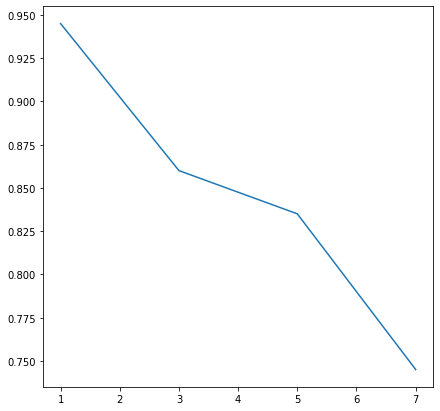

In [ ]:
plt.figure(figsize=(7, 7))

plt.plot(k_neighbours, accuracies_LDA)

